In [1]:
import cv2
import numpy as np
#importamos las librerias necesarias
import os
import sys
# Añadir el directorio principal al path
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('cuia.py'))))
import matplotlib.pyplot as plt

# Ahora podemos importar cuia
import cuia

In [3]:
path_detection = "dnns/face_detection_yunet_2023mar.onnx"
path_recognition = "dnns/face_recognition_sface_2021dec.onnx"

In [4]:
# Leer imagen
img = cv2.imread("Alejandro.jpg")  # Cambia esta ruta si es necesario
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
detector = cv2.FaceDetectorYN.create(path_detection, "", (img.shape[1], img.shape[0]))

In [5]:
_, faces = detector.detect(img)

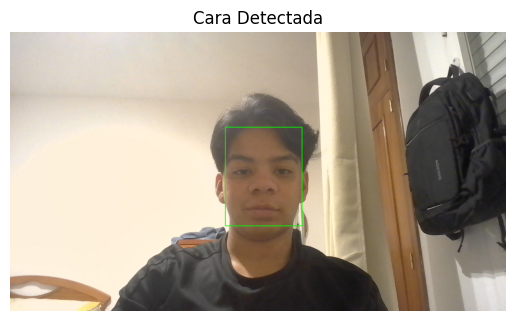

Embedding 1 (vector de características):
[[-0.3609712  -0.08180468  0.15029918 -0.4216508   1.2067881   0.11489771
   0.33820242 -0.43473697 -0.54168254  0.07253912 -0.24605864  0.21422626
   0.36452284 -0.06174707  0.16235684 -0.2258791  -0.16844036 -0.16368654
  -0.8290989   0.16914696 -0.7036328   0.01961496 -0.22469291 -0.071537
  -0.10911585  0.5280549  -0.10005621 -0.23939145 -0.33791888  0.12845904
  -0.03750211  0.3965533   0.5808664  -0.7236723   0.27655965  0.27889037
  -0.13931385  0.33018658 -0.21882516  0.3791072   0.20761041 -0.71420705
  -0.00349239  0.00656878  0.40397704  0.0879311   0.09020574  0.1468113
  -0.06925359  0.02841843 -0.15603952 -0.02488539 -0.05841063  0.13077846
  -0.59197587 -0.00317628  0.4668004  -0.1474374  -0.11148622 -0.02158921
  -0.42453092  0.23569934 -0.2987479  -0.25306296  0.24720651 -0.5983547
   0.26365668  0.03864107  0.10817858  0.3336862   0.2378072  -0.3658979
   0.30313635  0.00922494  1.126385    0.00253261 -0.5002422  -0.05069005
  

In [6]:
# Mostrar imagen con la cara detectada
if faces is not None and len(faces) > 0:
    for face in faces:
        x, y, w, h = face[:4].astype(int)
        cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.imshow(img_rgb)
    plt.title("Cara Detectada")
    plt.axis("off")
    plt.show()

    # Crear el reconocedor de caras
    recognizer = cv2.FaceRecognizerSF.create(path_recognition, "")

    # Extraer embedding de la primera cara
    embedding1 = recognizer.feature(img, faces[0])

    # Mostrar embedding como vector
    print("Embedding 1 (vector de características):")
    print(embedding1)
else:
    print("No se detectaron caras.")

In [6]:
import os
print(os.path.exists("dnns/face_detection_yunet_2023mar.onnx"))


True
